# importing library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_final=pd.read_csv('df_final')

/tmp/ipykernel_9154/2966395077.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final=pd.read_csv('df_final')


In [4]:
df_final['EMI']

0         24000.0
1         24000.0
2         24000.0
3         24000.0
4         24000.0
           ...   
360907    54370.0
360908    76800.0
360909    76800.0
360910    80100.0
360911    74341.0
Name: EMI, Length: 360912, dtype: float64

In [5]:
df_final.drop(['ID','EMI','Unnamed: 0.1','Unnamed: 0','AmountFinance','OVERDUE-AMT_y','OVERDUE-AMT_x','DisbursalDate','WRITE-OFF-AMT','0','State','Feedback','Top-up Month','AGE'],axis=1,inplace=True)

In [6]:
df_final['Target'].map({1:'yes',0:'no'})

0         yes
1         yes
2         yes
3         yes
4         yes
         ... 
360907    yes
360908    yes
360909    yes
360910     no
360911     no
Name: Target, Length: 360912, dtype: object

In [7]:
df_final['capable1'].map({1:'yes',0:'no'})

0         yes
1         yes
2         yes
3         yes
4         yes
         ... 
360907    yes
360908    yes
360909    yes
360910    yes
360911    yes
Name: capable1, Length: 360912, dtype: object

In [8]:
df_final

,Frequency,InstlmentMode,LoanStatus,Tenure,AssetCost,DisbursalAmount,LTV,MonthlyIncome,Target,new_emi1,capable1,ACCOUNT-STATUS
0,Monthly,Arrear,Closed,48,450000,275000.0,61.11,35833.0,1,24000.000000,1,Active
1,Monthly,Arrear,Closed,48,450000,275000.0,61.11,35833.0,1,24000.000000,1,Active
2,Monthly,Arrear,Closed,48,450000,275000.0,61.11,35833.0,1,24000.000000,1,Active
3,Monthly,Arrear,Closed,48,450000,275000.0,61.11,35833.0,1,24000.000000,1,Active
4,Monthly,Arrear,Closed,48,450000,275000.0,61.11,35833.0,1,24000.000000,1,Active
...,...,...,...,...,...,...,...,...,...,...,...,...
360907,Quatrly,Arrear,Closed,12,650000,200000.0,30.77,69083.0,1,18123.333333,1,Active
360908,Half Yearly,Arrear,Closed,24,470000,265601.0,40.17,65333.0,1,12800.000000,1,Active
360909,Half Yearly,Arrear,Closed,24,470000,265601.0,40.17,65333.0,1,12800.000000,1,Active
360910,Half Yearly,Arrear,Closed,24,460000,275630.0,59.92,83333.0,0,13350.000000,1,Active


In [9]:
df_final['Target'].value_counts()

0    239378
1    121534
Name: Target, dtype: int64

In [10]:
df_final['Frequency'].unique()

array(['Monthly', 'Quatrly', 'Half Yearly', 'BI-Monthly'], dtype=object)

In [11]:
df_final['capable1'].value_counts()

1    298471
0     62441
Name: capable1, dtype: int64

/tmp/ipykernel_9154/2285805241.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_final.corr()


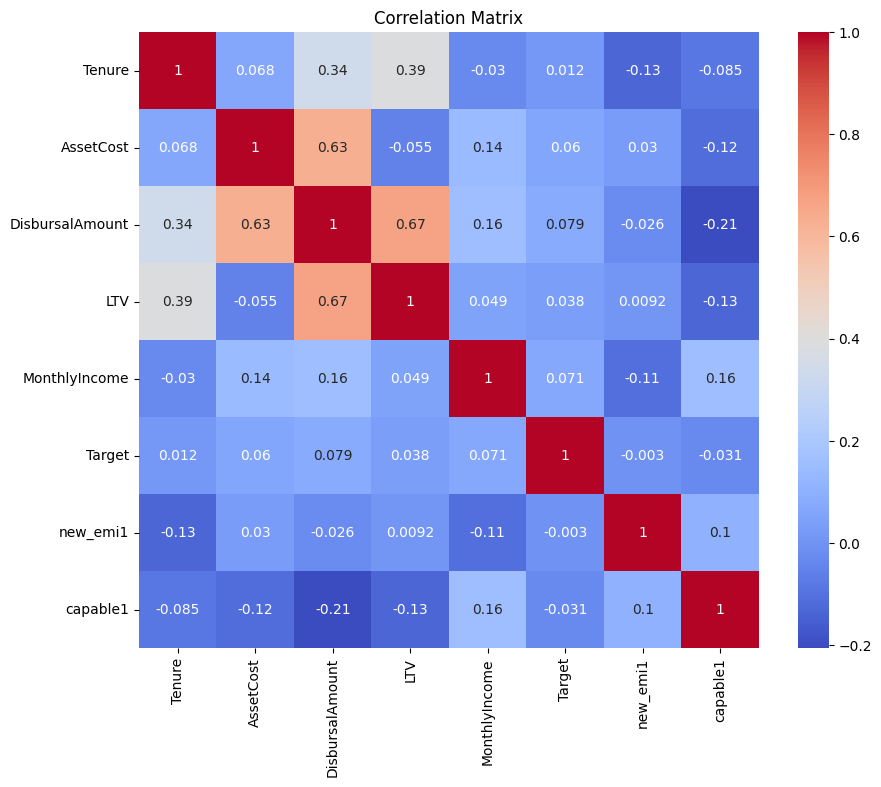

In [12]:
correlation_matrix = df_final.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360912 entries, 0 to 360911
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Frequency        360912 non-null  object 
 1   InstlmentMode    360912 non-null  object 
 2   LoanStatus       360912 non-null  object 
 3   Tenure           360912 non-null  int64  
 4   AssetCost        360912 non-null  int64  
 5   DisbursalAmount  360912 non-null  float64
 6   LTV              360912 non-null  float64
 7   MonthlyIncome    360451 non-null  float64
 8   Target           360912 non-null  int64  
 9   new_emi1         360912 non-null  float64
 10  capable1         360912 non-null  int64  
 11  ACCOUNT-STATUS   360912 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 33.0+ MB


# label encoding

In [15]:
cat_cols =df_final.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_final[col] = le.fit_transform(df_final[col])
    label_encoders[col] = le

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360912 entries, 0 to 360911
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Frequency        360912 non-null  int64  
 1   InstlmentMode    360912 non-null  int64  
 2   LoanStatus       360912 non-null  int64  
 3   Tenure           360912 non-null  int64  
 4   AssetCost        360912 non-null  int64  
 5   DisbursalAmount  360912 non-null  float64
 6   LTV              360912 non-null  float64
 7   MonthlyIncome    360451 non-null  float64
 8   Target           360912 non-null  int64  
 9   new_emi1         360912 non-null  float64
 10  capable1         360912 non-null  int64  
 11  ACCOUNT-STATUS   360912 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 33.0 MB


In [17]:
X = df_final.drop(columns=['capable1'])
y = df_final['capable1']

In [182]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression

In [184]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.8197498025850962


# knn

In [185]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.9392239169887646


# dession tree

In [186]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9998060485155784


# creating pickle file

In [187]:
import pickle
with open('lr_model.pkl','wb') as file:
    pickle.dump(lr_model,file)

In [188]:
df_final['Frequency'].nunique()

4

{}